In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from perceptron import Perceptron
from sklearn.model_selection import train_test_split

In [2]:
x, y, coef = make_regression(n_samples=100,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))

# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

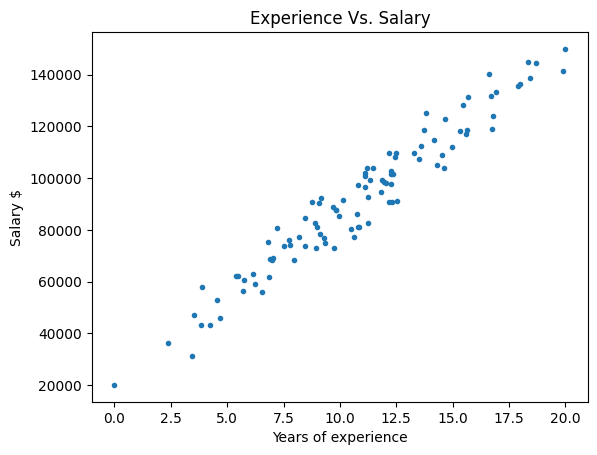

In [3]:
plt.ion() #interactive plot on
plt.plot(x,y,'.',label='training data')
plt.xlabel('Years of experience');plt.ylabel('Salary $')
plt.title('Experience Vs. Salary')
plt.show()

In [4]:
df = pd.DataFrame(data={'experience':x.flatten(), 'salary':y})
df.head(10)

,experience,salary
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963
5,12.427999,108021.442271
6,6.534503,55778.019993
7,12.363590,101586.979793
8,11.451010,103966.618570
9,9.295277,76826.009140


In [5]:
X = df["experience"].values
Y = df["salary"].values

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Perceptron

In [16]:
loss_trains = []
losss = []
η1s = []
η2s = []
for η1 in np.arange(0.0001, 0.001, 0.0002):
    for η2 in np.arange(.01, .1, .02):
        p = Perceptron(η1, η2, 30)
        loss_train = p.fit(X_train, Y_train)
        loss_trains.append({'η1': η1, 'η2': η1, 'loss_train': loss_train})
        losss.append(loss_train)
        η1s.append(η1)
        η2s.append(η2)
        print(f'η1: {"{:.4f}".format(η1)}, η2: {"{:.2f}".format(η2)}, loss_train: {np.log10(loss_train)}')

η1: 0.0001, η2: 0.01, loss_train: 7.657924747862036
η1: 0.0001, η2: 0.03, loss_train: 7.656891652629945
η1: 0.0001, η2: 0.05, loss_train: 7.659521284240036
η1: 0.0001, η2: 0.07, loss_train: 7.666787227464819
η1: 0.0001, η2: 0.09, loss_train: 7.676752389343247
η1: 0.0003, η2: 0.01, loss_train: 7.646290395825738
η1: 0.0003, η2: 0.03, loss_train: 7.64982212568881
η1: 0.0003, η2: 0.05, loss_train: 7.655509718091232
η1: 0.0003, η2: 0.07, loss_train: 7.662949712121574
η1: 0.0003, η2: 0.09, loss_train: 7.671583558209347
η1: 0.0005, η2: 0.01, loss_train: 7.649119267103052
η1: 0.0005, η2: 0.03, loss_train: 7.653865271405348
η1: 0.0005, η2: 0.05, loss_train: 7.660411837349886
η1: 0.0005, η2: 0.07, loss_train: 7.668212925937714
η1: 0.0005, η2: 0.09, loss_train: 7.676924654945898
η1: 0.0007, η2: 0.01, loss_train: 7.652111674787667
η1: 0.0007, η2: 0.03, loss_train: 7.657934514152927
η1: 0.0007, η2: 0.05, loss_train: 7.664876667535478
η1: 0.0007, η2: 0.07, loss_train: 7.672812536505953
η1: 0.0007, η

In [21]:
i = np.argmin(losss)
η1 = η1s[i]
η2 = η2s[i]

In [22]:
p = Perceptron(η1, η2, 30)
loss_train = p.fit(X_train, Y_train)
Y_pred_train = p.predict(X_train)

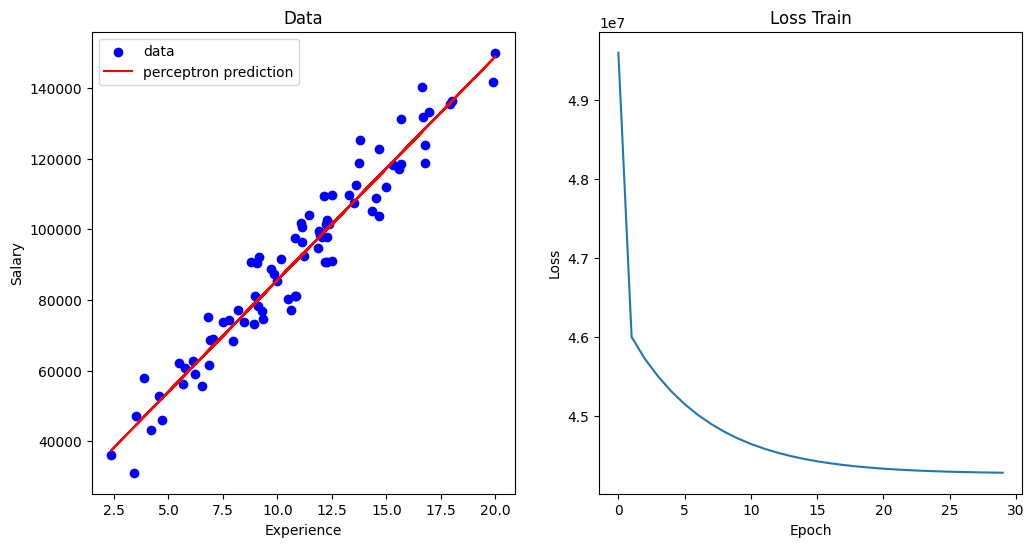

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.scatter(X_train, Y_train, c='blue')
ax1.plot(X_train, Y_pred_train, c='red')
ax1.set_title("Data")
ax1.set_xlabel("Experience")
ax1.set_ylabel("Salary")
ax1.legend(['data','perceptron prediction'])

# Show Loss
ax2.plot(p.losses_train)
ax2.set_title("Loss Train")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")


plt.show()